In [824]:
import pandas as pd
from sklearn.svm import OneClassSVM
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

In [825]:
df=pd.read_csv('df.csv')

In [826]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,0,19.652124,19.768407,19.371101,19.400173,7587200,0.000180,7
1,1,19.177295,19.322651,19.070700,19.167604,6192500,0.000176,7
2,2,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7
3,3,19.584289,19.632742,19.477696,19.487387,4228200,0.000179,7
4,4,19.312958,19.409862,19.216053,19.371099,5145700,0.000177,7


In [827]:
df.columns

Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume', 'SHigh',
       'encoded_stock'],
      dtype='object')

In [828]:
df.dtypes

Unnamed: 0         int64
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
SHigh            float64
encoded_stock      int64
dtype: object

In [829]:
df=df.drop(columns='Unnamed: 0')

In [830]:
df.isna().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
SHigh            0
encoded_stock    0
dtype: int64

In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           3811 non-null   float64
 1   High           3811 non-null   float64
 2   Low            3811 non-null   float64
 3   Close          3811 non-null   float64
 4   Volume         3811 non-null   int64  
 5   SHigh          3811 non-null   float64
 6   encoded_stock  3811 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 208.5 KB


In [832]:
df.describe()

,Open,High,Low,Close,Volume,SHigh,encoded_stock
count,3811.000000,3811.000000,3811.000000,3811.000000,3.811000e+03,3811.000000,3811.000000
mean,11439.142243,11631.420143,11248.392717,11445.375023,4.567803e+09,0.106597,6.434269
std,26421.484058,26868.406384,25973.478493,26435.412286,1.392383e+10,0.246240,4.073804
min,0.083592,0.085407,0.080831,0.083593,1.486950e+05,0.000000,0.000000
25%,109.173252,110.937963,106.011078,108.423862,9.247278e+06,0.001016,3.000000
50%,178.130005,180.728358,175.069696,178.080002,3.315530e+07,0.001656,6.000000
75%,536.015869,540.791016,527.346115,535.053375,9.620055e+08,0.004955,10.000000
max,106147.296875,109114.882812,105291.734375,106146.265625,1.492189e+11,1.000000,13.000000


In [833]:
df.size

26677

In [834]:
df.shape

(3811, 7)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'SHigh'}>],
       [<Axes: title={'center': 'encoded_stock'}>, <Axes: >, <Axes: >]],
      dtype=object)

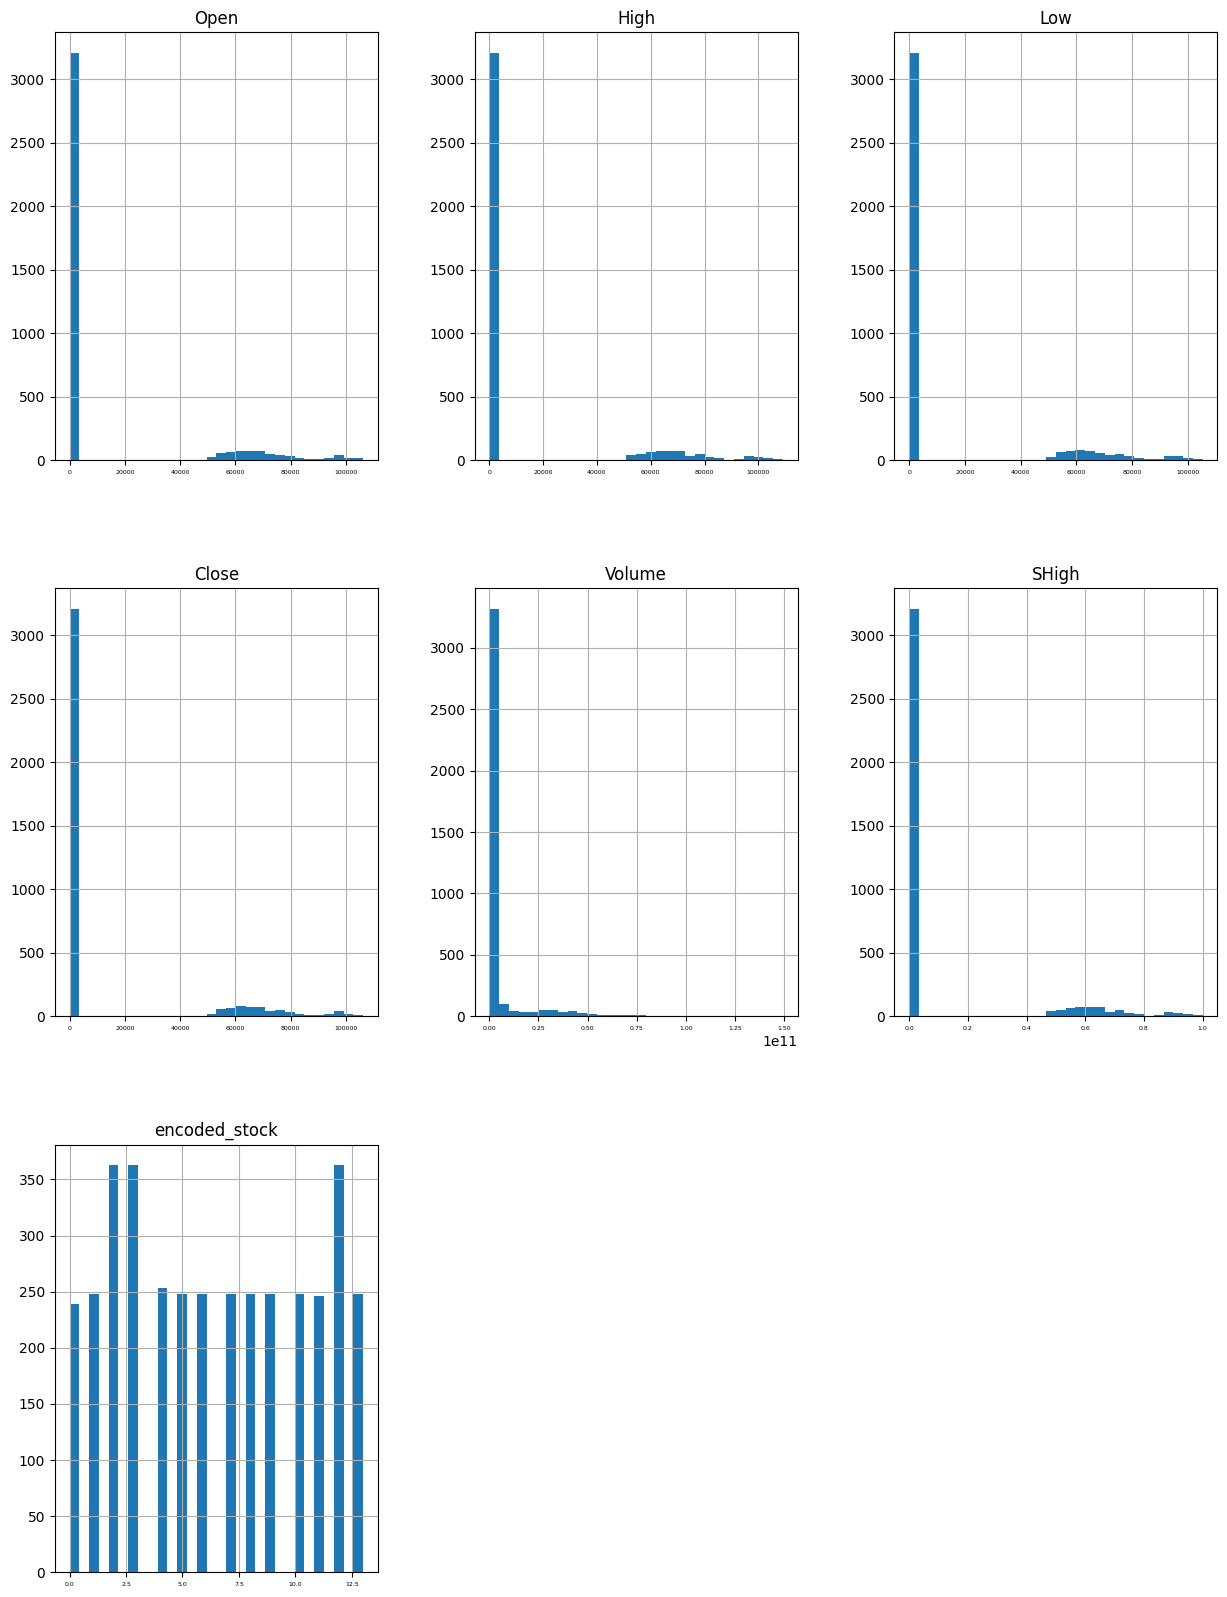

In [835]:
import matplotlib.pyplot as plt
df.hist(column=df.columns,bins=30,figsize=(15,20),grid=True,xlabelsize=4.5)

In [836]:
#transform
# pt=PowerTransformer(method="yeo-johnson")
# pt.set_output(transform="pandas")
# dft=pt.fit_transform(df)

In [837]:
type(df)

pandas.core.frame.DataFrame

In [838]:
from sklearn.pipeline import Pipeline

pipe=Pipeline([ 
   ( "transform",PowerTransformer(method="yeo-johnson")),
     ("scaler",MinMaxScaler()),
     ("mode",OneClassSVM(nu=0.05,kernel='linear',gamma='scale'))])
dft=pipe[:-1].fit_transform(df)
# pipe = Pipeline([
#     ("transform", PowerTransformer(method="yeo-johnson")),
# ("scaler", MinMaxScaler())
# ])

# df_transformed = pipe.fit_transform(df)
# model = OneClassSVM(nu=0.01, kernel='linear', gamma=0.1)
# model.fit(df_transformed)  


In [839]:
print(pipe)

Pipeline(steps=[('transform', PowerTransformer()), ('scaler', MinMaxScaler()),
                ('mode', OneClassSVM(kernel='linear', nu=0.05))])


In [840]:
pipe.set_output(transform="pandas")

Pipeline(steps=[('transform', PowerTransformer()), ('scaler', MinMaxScaler()),
                ('mode', OneClassSVM(kernel='linear', nu=0.05))])

In [841]:
from sklearn import set_config as st

In [842]:
st(pipe)
display(pipe)

Pipeline(steps=[('transform', PowerTransformer()), ('scaler', MinMaxScaler()),
                ('mode', OneClassSVM(kernel='linear', nu=0.05))])

In [843]:
# dft
# pipe.fit_transform(df)

In [844]:
# scaler = MinMaxScaler()
# # scaled_data = scaler.fit_transform(df)
# scaler.set_output(transform="pandas")
# scaled_data = scaler.fit_transform(dft)

In [845]:
# scaled_data

In [846]:
scaled_data=pipe[:-1].transform(df)

d:\final_model\tf\final_project\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [847]:
type(scaled_data)

pandas.core.frame.DataFrame

In [848]:
#scaled_data=pd.DataFrame(scaled_data)
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3811 entries, 0 to 3810
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      3811 non-null   float64
 1   x1      3811 non-null   float64
 2   x2      3811 non-null   float64
 3   x3      3811 non-null   float64
 4   x4      3811 non-null   float64
 5   x5      3811 non-null   float64
 6   x6      3811 non-null   float64
dtypes: float64(7)
memory usage: 208.5 KB


In [849]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.652124,19.768407,19.371101,19.400173,7587200,0.000180,7
1,19.177295,19.322651,19.070700,19.167604,6192500,0.000176,7
2,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7
3,19.584289,19.632742,19.477696,19.487387,4228200,0.000179,7
4,19.312958,19.409862,19.216053,19.371099,5145700,0.000177,7
...,...,...,...,...,...,...,...
3806,199.589798,207.274643,194.241318,200.497559,3380872965,0.001899,12
3807,200.498245,208.827499,196.380768,200.356354,4106376694,0.001913,12
3808,200.358917,205.924194,195.321503,197.982361,3907611299,0.001886,12
3809,197.983856,198.449814,189.608429,196.773804,4290836657,0.001818,12


In [850]:
sc=scaled_data.corr()

<Axes: >

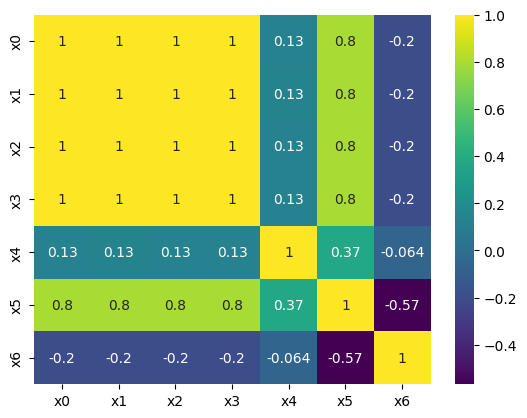

In [851]:
sns.heatmap(data=sc, annot=True, cmap="viridis")

In [852]:
scaled_data

,x0,x1,x2,x3,x4,x5,x6
0,0.306092,0.305555,0.305564,0.304916,0.382200,0.002209,0.628208
1,0.303827,0.303449,0.304115,0.303799,0.364795,0.002159,0.628208
2,0.305726,0.305374,0.306257,0.306247,0.370153,0.002205,0.628208
3,0.305772,0.304919,0.306072,0.305331,0.331463,0.002194,0.628208
4,0.304480,0.303864,0.304819,0.304777,0.348723,0.002169,0.628208
...,...,...,...,...,...,...,...
3806,0.516679,0.518467,0.515253,0.517100,0.809444,0.022989,0.942662
3807,0.517077,0.519120,0.516215,0.517038,0.820430,0.023159,0.942662
3808,0.517016,0.517896,0.515740,0.515993,0.817640,0.022841,0.942662
3809,0.515971,0.514662,0.513133,0.515456,0.822894,0.022021,0.942662


In [853]:
scaled_data.head()

,x0,x1,x2,x3,x4,x5,x6
0,0.306092,0.305555,0.305564,0.304916,0.382200,0.002209,0.628208
1,0.303827,0.303449,0.304115,0.303799,0.364795,0.002159,0.628208
2,0.305726,0.305374,0.306257,0.306247,0.370153,0.002205,0.628208
3,0.305772,0.304919,0.306072,0.305331,0.331463,0.002194,0.628208
4,0.304480,0.303864,0.304819,0.304777,0.348723,0.002169,0.628208


In [854]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.652124,19.768407,19.371101,19.400173,7587200,0.000180,7
1,19.177295,19.322651,19.070700,19.167604,6192500,0.000176,7
2,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7
3,19.584289,19.632742,19.477696,19.487387,4228200,0.000179,7
4,19.312958,19.409862,19.216053,19.371099,5145700,0.000177,7
...,...,...,...,...,...,...,...
3806,199.589798,207.274643,194.241318,200.497559,3380872965,0.001899,12
3807,200.498245,208.827499,196.380768,200.356354,4106376694,0.001913,12
3808,200.358917,205.924194,195.321503,197.982361,3907611299,0.001886,12
3809,197.983856,198.449814,189.608429,196.773804,4290836657,0.001818,12


In [855]:
# model=OneClassSVM(nu=0.01,kernel='linear',gamma=0.1)

In [856]:
print(pipe[-1].fit(scaled_data))

OneClassSVM(kernel='linear', nu=0.05)


In [857]:
predictions=pipe[-1].predict(dft)

d:\final_model\tf\final_project\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


In [858]:
type(predictions)

numpy.ndarray

In [859]:
predictions=pd.DataFrame(predictions)

In [860]:
predictions

,0
0,1
1,1
2,1
3,1
4,1
...,...
3806,1
3807,1
3808,1
3809,1


In [861]:
da=df.copy()

In [862]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.652124,19.768407,19.371101,19.400173,7587200,0.000180,7
1,19.177295,19.322651,19.070700,19.167604,6192500,0.000176,7
2,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7
3,19.584289,19.632742,19.477696,19.487387,4228200,0.000179,7
4,19.312958,19.409862,19.216053,19.371099,5145700,0.000177,7
...,...,...,...,...,...,...,...
3806,199.589798,207.274643,194.241318,200.497559,3380872965,0.001899,12
3807,200.498245,208.827499,196.380768,200.356354,4106376694,0.001913,12
3808,200.358917,205.924194,195.321503,197.982361,3907611299,0.001886,12
3809,197.983856,198.449814,189.608429,196.773804,4290836657,0.001818,12


In [863]:
da['Anomalies']=predictions

In [864]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.652124,19.768407,19.371101,19.400173,7587200,0.000180,7
1,19.177295,19.322651,19.070700,19.167604,6192500,0.000176,7
2,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7
3,19.584289,19.632742,19.477696,19.487387,4228200,0.000179,7
4,19.312958,19.409862,19.216053,19.371099,5145700,0.000177,7
...,...,...,...,...,...,...,...
3806,199.589798,207.274643,194.241318,200.497559,3380872965,0.001899,12
3807,200.498245,208.827499,196.380768,200.356354,4106376694,0.001913,12
3808,200.358917,205.924194,195.321503,197.982361,3907611299,0.001886,12
3809,197.983856,198.449814,189.608429,196.773804,4290836657,0.001818,12


In [865]:
da[da['Anomalies']==-1]


,Open,High,Low,Close,Volume,SHigh,encoded_stock,Anomalies
1594,0.086016,0.086059,0.082205,0.083593,347758664,5.975361e-09,3,-1
1595,0.083592,0.085700,0.083017,0.085166,300251530,2.685259e-09,3,-1
1596,0.085169,0.090536,0.085121,0.089477,663450017,4.700556e-08,3,-1
1597,0.089474,0.091208,0.083568,0.086143,801458657,5.316426e-08,3,-1
1598,0.086148,0.086222,0.082173,0.084615,435393890,7.469235e-09,3,-1
...,...,...,...,...,...,...,...,...
3193,51.900002,51.900002,50.980000,51.459999,269714,4.748631e-04,4,-1
3194,51.560001,52.060001,51.119999,51.119999,282395,4.763295e-04,4,-1
3195,50.980000,51.419998,50.900002,51.000000,269855,4.704641e-04,4,-1
3196,51.180000,51.639999,51.180000,51.560001,188369,4.724803e-04,4,-1


In [866]:
len(da[da['Anomalies']==-1])

192

In [867]:
df

,Open,High,Low,Close,Volume,SHigh,encoded_stock
0,19.652124,19.768407,19.371101,19.400173,7587200,0.000180,7
1,19.177295,19.322651,19.070700,19.167604,6192500,0.000176,7
2,19.574599,19.729645,19.516456,19.681192,6590200,0.000180,7
3,19.584289,19.632742,19.477696,19.487387,4228200,0.000179,7
4,19.312958,19.409862,19.216053,19.371099,5145700,0.000177,7
...,...,...,...,...,...,...,...
3806,199.589798,207.274643,194.241318,200.497559,3380872965,0.001899,12
3807,200.498245,208.827499,196.380768,200.356354,4106376694,0.001913,12
3808,200.358917,205.924194,195.321503,197.982361,3907611299,0.001886,12
3809,197.983856,198.449814,189.608429,196.773804,4290836657,0.001818,12


In [868]:
predictions.shape

(3811, 1)

In [869]:
da['Anomalies']

0       1
1       1
2       1
3       1
4       1
       ..
3806    1
3807    1
3808    1
3809    1
3810    1
Name: Anomalies, Length: 3811, dtype: int64

Text(0.5, 0, 'High')

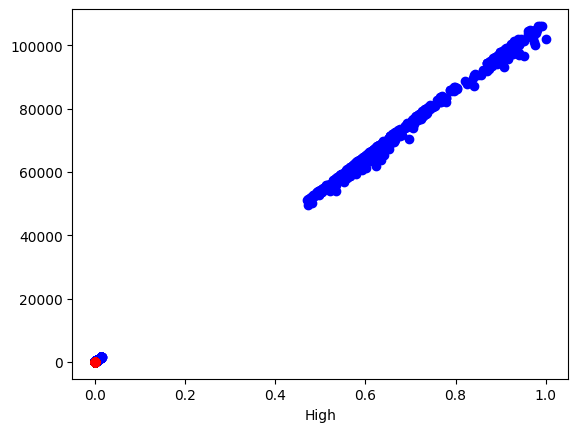

In [870]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
# ----> 2 plt.scatter(da.loc[da['Anomalies']==1, 'SHigh'], da.loc[da['Anomalies']== 1, 'Close'], label='Normal', color='blue')
#       3 plt.scatter(da.loc[da['Anomalies']==-1, 'SHigh'], da.loc[da['Anomalies']== -1, 'Close'], label='Anomalies', color='red')
plt.scatter(da.loc[da['Anomalies']==1,'SHigh'], da.loc[da['Anomalies']==1, 'Close'], label='Normal', color='blue')
plt.scatter(da.loc[da['Anomalies']==-1, 'SHigh'], da.loc[da['Anomalies']==-1, 'Close'], label='Anomalies', color='red')
plt.xlabel('High')

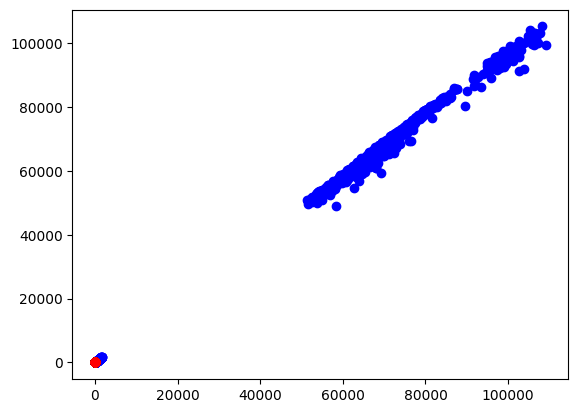

In [871]:
plt.scatter(da.loc[da['Anomalies']==1,'High'], da.loc[da['Anomalies']==1, 'Low'], label='Normal', color='blue')
plt.scatter(da.loc[da['Anomalies']==-1, 'High'], da.loc[da['Anomalies']==-1, 'Low'], label='Anomalies', color='red')
# plt.scatter(da.loc[da['Anomalies']==1,'High'],da.loc[da['Anomalies']==1,'Low'],label='Normal',color='blue')
# plt.scatter(da.loc[da['Anomalies'] == -1, 'High'], da.loc[da['Anomalies'] == -1, 'Low'], label='Anomalies', color='red')

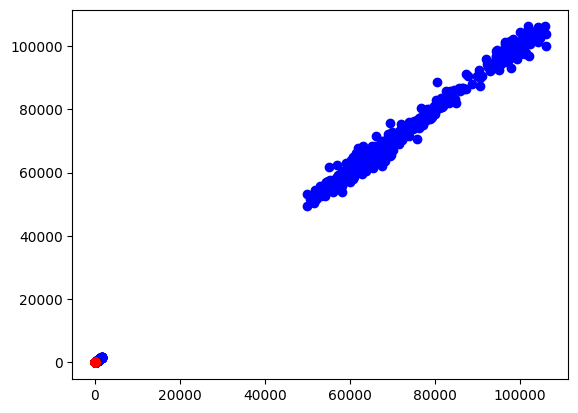

In [872]:
plt.scatter(da.loc[da['Anomalies']==1, 'Open'], da.loc[da['Anomalies']== 1, 'Close'], label='Normal', color='blue')
plt.scatter(da.loc[da['Anomalies']==-1, 'Open'], da.loc[da['Anomalies']==-1, 'Close'], label='Anomalies', color='red')

In [873]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SHigh', 'encoded_stock'], dtype='object')

In [874]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

num_points = 50
num_anomalies = 15

# Generate normal stock data
test_data = pd.DataFrame({
    'Open': np.random.uniform(150, 700, num_points),
    'High': np.random.uniform(151, 710, num_points),
    'Low': np.random.uniform(149, 690, num_points),
    'Close': np.random.uniform(150, 705, num_points),
    'Volume': np.random.randint(1_000_000, 100_000_000, num_points),
    'SHigh': np.random.uniform(0.001, 0.01, num_points),
    'encoded_stock': np.random.randint(1, 15, num_points)
})

# Introduce anomalies
anomaly_indices = np.random.choice(num_points, num_anomalies, replace=False)

for i in anomaly_indices:
    # Introduce different anomaly types for variety
    anomaly_type = np.random.choice(['price_spike', 'price_crash', 'volume_surge', 'volume_drop'])

    if anomaly_type == 'price_spike':
        test_data.loc[i, ['Open', 'High', 'Low', 'Close']] *= np.random.uniform(2, 5)  # Larger price spike
    elif anomaly_type == 'price_crash':
        test_data.loc[i, ['Open', 'High', 'Low', 'Close']] *= np.random.uniform(0.2, 0.5) # Price Crash
    elif anomaly_type == 'volume_surge':
        test_data.loc[i, 'Volume'] *= np.random.uniform(5, 10)  # Larger volume surge
    elif anomaly_type == 'volume_drop':
        test_data.loc[i, 'Volume'] *= np.random.uniform(0.1, 0.3)  # Significant volume drop
    
    # SHigh anomalies -  make them more related to price changes
    if anomaly_type in ['price_spike','price_crash']:
        test_data.loc[i, 'SHigh'] *= np.random.uniform(2, 5) # SHigh changes with price

# Print first few rows and anomaly indices
print(test_data.head())
print("\nAnomaly indices:", anomaly_indices)

# You can save this to a CSV file if needed:
# test_data.to_csv("stock_data_with_anomalies.csv", index=False)

         Open        High         Low  ...        Volume     SHigh  encoded_stock
0  355.997065  692.997807  166.003189  ...  7.415036e+07  0.003072              6
1  672.892869  584.299248  493.298032  ...  2.866321e+08  0.005493              3
2  552.596668  676.179908  319.066586  ...  9.394292e+07  0.006148              9
3  479.262166  651.208489  424.136744  ...  2.410138e+07  0.007917             10
4  235.810252  485.226088  639.993462  ...  1.856919e+07  0.001392             14

[5 rows x 7 columns]

Anomaly indices: [27  7 48 34 35  1 17 12  5 10  9 23 20 49 40]


C:\Users\arifu\AppData\Local\Temp\ipykernel_5824\1172180460.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '184195083.72589582' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  test_data.loc[i, 'Volume'] *= np.random.uniform(5, 10)  # Larger volume surge


In [875]:
from sklearn.preprocessing import MinMaxScaler
test_data=pipe[:-1].fit_transform(test_data)
# scaler=MinMaxScaler()
# scaled_data=scaler.fit_transform(test_data)
predictions=pipe[-1].predict(scaled_data)



In [876]:
# test_data['Anomalies']=predictions
test_data['Anomalies']=pd.DataFrame(predictions)

In [877]:
test_data

,Open,High,Low,Close,Volume,SHigh,encoded_stock,Anomalies
0,0.473602,0.610112,0.248058,0.613296,0.595392,0.236330,0.427306,1
1,0.647242,0.563115,0.556140,0.313296,0.836136,0.446529,0.182978,1
2,0.592713,0.603260,0.429358,0.237260,0.634783,0.492680,0.651914,1
3,0.553749,0.592821,0.511643,0.458133,0.422653,0.598899,0.723766,1
4,0.365270,0.513468,0.634198,0.635402,0.385754,0.045019,1.000000,1
5,0.715393,1.000000,0.782176,0.770463,0.549238,1.000000,0.932413,1
6,0.298662,0.297757,0.472710,0.534837,0.548513,0.426824,0.427306,1
7,1.000000,0.698413,1.000000,1.000000,0.606064,0.826910,0.723766,1
8,0.554516,0.269034,0.384913,0.311905,0.499583,0.650367,0.723766,1
9,0.586092,0.417477,0.285594,0.555231,0.297369,0.588787,0.427306,1


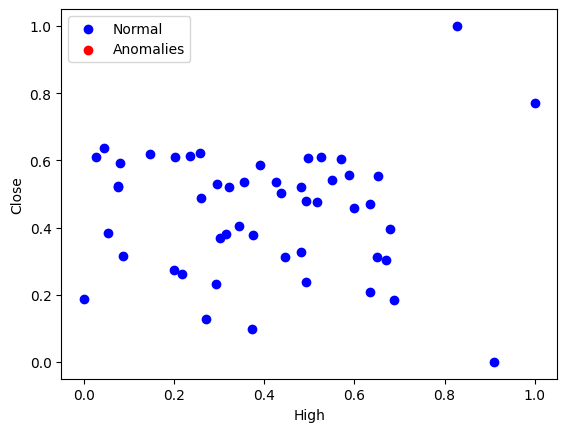

In [878]:
import matplotlib.pyplot as plt

plt.scatter(test_data.loc[test_data['Anomalies']== 1,'SHigh'],test_data.loc[test_data['Anomalies']== 1, 'Close'], label='Normal', color='blue')
plt.scatter(test_data.loc[test_data['Anomalies']==-1,'SHigh'],test_data.loc[test_data['Anomalies']==-1,'Close'], label='Anomalies', color='red')
plt.xlabel('High')
plt.ylabel('Close')
plt.legend()
plt.show()


In [879]:
print("end of file")

end of file
